![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline является хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

import re
import datetime as dt

/kaggle/input/df-preproc-07/df_preproc_07.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/cuisines/cuisines.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
14543,id_3800,Madrid,"['Seafood', 'Spanish']",3802.0,$$ - $$$,28.0,"[['Best barra for a casual meal in Madrid!'], ...",/Restaurant_Review-g187514-d5827919-Reviews-Ma...,d5827919,1,4.0
30548,id_1102,Stockholm,"['French', 'European', 'Swedish']",1103.0,$$ - $$$,NaN,"[[], []]",/Restaurant_Review-g189852-d12321597-Reviews-T...,d12321597,1,5.0
41562,id_2620,Brussels,"['Belgian', 'European']",2621.0,$$ - $$$,13.0,[['Beatiful place but would benefit from bett....,/Restaurant_Review-g188644-d3683254-Reviews-Eu...,d3683254,1,3.0
39847,id_11758,London,NaN,11768.0,NaN,4.0,"[['Nice', 'Just been redone'], ['12/17/2015', ...",/Restaurant_Review-g186338-d5828075-Reviews-Ch...,d5828075,1,4.5
43488,id_6356,London,"['Cafe', 'Italian']",6365.0,$,12.0,"[['Fantastic food', 'Old-style London Italian ...",/Restaurant_Review-g186338-d4924342-Reviews-Ca...,d4924342,1,4.5


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [15]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [16]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [17]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
# data['Number of Reviews'].fillna(0, inplace=True)

In [18]:
# Заполняю своим кодом:
    cnt=0
    idxList = data.index[data['Number of Reviews'].isna()].to_list()
    
    for idx in idxList:
#         cnt += 1
#         if cnt>5:
#             break
        if data.loc[idx, 'Reviews'] == '[[], []]' or pd.isna(data.loc[idx, 'Reviews']):
            data.loc[idx, 'Number of Reviews'] = 0
        else:
            lst = []
            lst = re.findall(r'\d\d\/\d\d\/\d{4}', data['Reviews'].iloc[idx])
            data.loc[idx, 'Number of Reviews'] = len(lst)


In [19]:
data.loc[data['Number of Reviews'] == 2]

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN
6,id_6,Lisbon,"['European', 'Portuguese']",3704.0,$,2.0,"[[], []]",/Restaurant_Review-g189158-d8758873-Reviews-Li...,d8758873,0,0.0,0
8,id_8,Helsinki,"['European', 'Scandinavian']",771.0,NaN,2.0,"[['Big group supper', 'Good food but very slow...",/Restaurant_Review-g189934-d12947542-Reviews-B...,d12947542,0,0.0,0
18,id_18,Vienna,NaN,3360.0,NaN,2.0,"[[], []]",/Restaurant_Review-g190454-d8435085-Reviews-An...,d8435085,0,0.0,0
39,id_39,Oslo,NaN,609.0,NaN,2.0,"[['Fantastic, friendly service', 'High quality...",/Restaurant_Review-g190479-d12170920-Reviews-K...,d12170920,0,0.0,0
93,id_93,Prague,NaN,2787.0,NaN,2.0,"[['Amazing Italian food in Prague'], ['10/07/2...",/Restaurant_Review-g274707-d4769732-Reviews-Pi...,d4769732,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49883,id_2203,Brussels,NaN,2254.0,NaN,2.0,"[['Quick, good African food'], ['02/14/2017']]",/Restaurant_Review-g1136493-d10524953-Reviews-...,d10524953,1,4.0,0
49885,id_4260,Barcelona,NaN,4261.0,NaN,2.0,"[[""Viva Marina's"", 'Fabulous hidden gem in Bar...",/Restaurant_Review-g187497-d6756273-Reviews-Ma...,d6756273,1,5.0,0
49926,id_4202,Barcelona,"['Mediterranean', 'European']",4203.0,$$ - $$$,2.0,"[[], []]",/Restaurant_Review-g187497-d12115145-Reviews-G...,d12115145,1,5.0,0
49934,id_11032,London,NaN,11042.0,NaN,2.0,"[['Nice Fry-Up', 'Pretty much the best budget ...",/Restaurant_Review-g186338-d12458176-Reviews-C...,d12458176,1,4.5,0


### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [20]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1575
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [21]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [22]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
47978,id_92,"['Mediterranean', 'Greek', 'Seafood', 'Vegan O...",93.0,$$ - $$$,178.0,"[['Good food..friendly staff!!', 'best seafood...",/Restaurant_Review-g189400-d3820482-Reviews-Ab...,d3820482,1,4.5,...,0,0,0,0,0,0,0,0,0,0
46099,id_8251,['French'],8252.0,$$ - $$$,1.0,"[['Welcoming Restaurant'], ['08/15/2017']]",/Restaurant_Review-g187147-d11961472-Reviews-C...,d11961472,1,5.0,...,0,0,1,0,0,0,0,0,0,0
38054,id_2304,['German'],2306.0,$,13.0,"[['Incredible Value', 'Guten Apetit!'], ['04/1...",/Restaurant_Review-g187323-d8374258-Reviews-Th...,d8374258,1,4.0,...,0,0,0,0,0,0,0,0,0,0
45327,id_145,"['Irish', 'Cafe', 'European', 'British', 'Vege...",146.0,$$ - $$$,584.0,"[['Brunch', 'Great coffee nice atmosphere'], [...",/Restaurant_Review-g186605-d3679796-Reviews-Ha...,d3679796,1,4.5,...,0,0,0,0,0,0,0,0,0,0
42716,id_162,"['Mediterranean', 'European', 'Portuguese', 'V...",163.0,$$ - $$$,346.0,"[['Excellent food and service', 'Very romantic...",/Restaurant_Review-g189158-d7916133-Reviews-Re...,d7916133,1,4.5,...,0,0,0,0,0,0,0,0,0,0


#### Возьмем следующий признак "Price Range".

In [24]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [25]:
# Ваша обработка 'Price Range'
data['Price Range'] = data['Price Range'].apply(lambda x: 0 if pd.isna(x) else 1 if x=='$' else 2 if x=='$$ - $$$' else 3)

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

In [26]:
# Дополнительный подход. Сначала скопируем колонку
data['PriceRangeDummy'] = data['Price Range']
data = pd.get_dummies(data, columns=['PriceRangeDummy',], dummy_na=True)

In [27]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,PriceRangeDummy_0.0,PriceRangeDummy_1.0,PriceRangeDummy_2.0,PriceRangeDummy_3.0,PriceRangeDummy_nan
4141,id_4141,NaN,2617.0,0,4.0,"[[], []]",/Restaurant_Review-g187331-d5852715-Reviews-Mc...,d5852715,0,0.0,...,0,0,0,0,0,1,0,0,0,0
49620,id_560,"['European', 'Portuguese']",561.0,1,42.0,[['Drop-in from street for a very tasty lunch'...,/Restaurant_Review-g189180-d7991063-Reviews-Ar...,d7991063,1,4.5,...,0,0,0,0,0,0,1,0,0,0
2904,id_2904,"['Bar', 'European', 'Australian', 'Vegetarian ...",253.0,2,256.0,"[['Excellent food! Great service!', 'Mixed res...",/Restaurant_Review-g188590-d6542442-Reviews-Dr...,d6542442,0,0.0,...,0,0,0,0,0,0,0,1,0,0
14935,id_7627,"['Japanese', 'Sushi']",7628.0,2,34.0,[['Good quality of fresh fish and tamago sush....,/Restaurant_Review-g187147-d5326153-Reviews-La...,d5326153,1,4.0,...,0,0,0,0,0,0,0,1,0,0
9465,id_9465,"['Italian', 'Mediterranean', 'European', 'Vege...",425.0,3,115.0,"[['Good food and service', 'excellent food, gr...",/Restaurant_Review-g188113-d3864724-Reviews-Il...,d3864724,0,0.0,...,0,0,0,1,0,0,0,0,1,0


### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [28]:
# тут ваш код на обработку других признаков
# .....

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

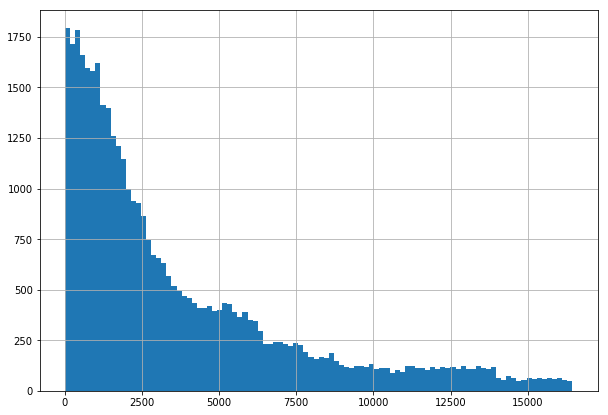

In [29]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

In [30]:
# df_train.loc[(10990<=df_train['Ranking']) & (df_train['Ranking']<=11010)]#.Ranking.value_counts()
# df_train.loc[df_train['Ranking'] == 15000]

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

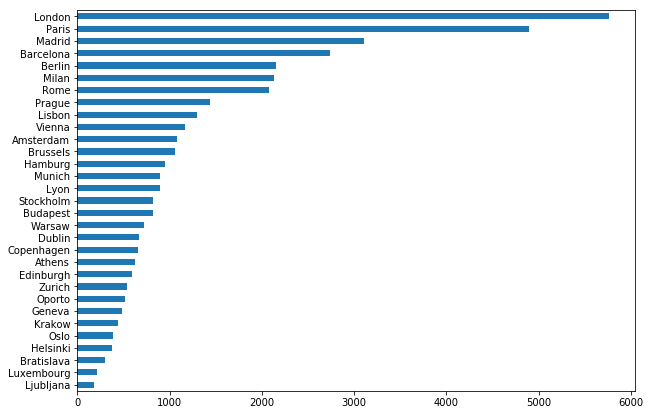

In [31]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

In [32]:
df_train['City'].unique()

array(['Paris', 'Stockholm', 'London', 'Berlin', 'Munich', 'Oporto',
       'Milan', 'Bratislava', 'Vienna', 'Rome', 'Barcelona', 'Madrid',
       'Dublin', 'Brussels', 'Zurich', 'Warsaw', 'Budapest', 'Copenhagen',
       'Amsterdam', 'Lyon', 'Hamburg', 'Lisbon', 'Prague', 'Oslo',
       'Helsinki', 'Edinburgh', 'Geneva', 'Ljubljana', 'Athens',
       'Luxembourg', 'Krakow'], dtype=object)

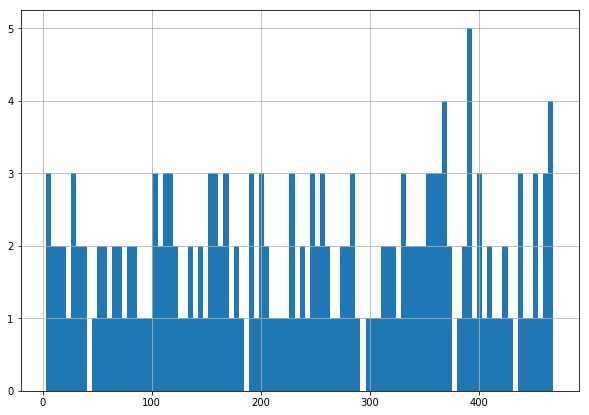

In [33]:
df_train['Ranking'][df_train['City'] == 'Ljubljana'].hist(bins=100)

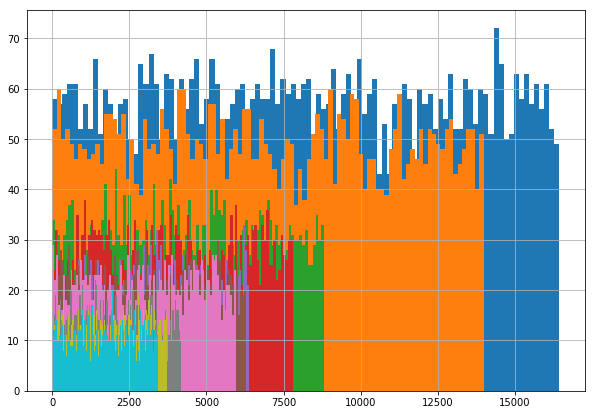

In [34]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за этого мы имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

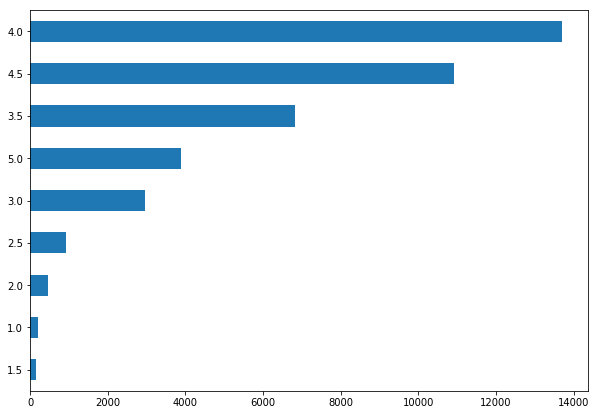

In [35]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')
# data['Price Range'].value_counts(ascending=True).plot(kind='barh')
# data['Number of Reviews'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

In [36]:
df_train.loc[df_train['Ranking']>=100].City.unique()
# df_train.loc[df_train['Ranking']==4].Ranking.value_counts()

array(['Paris', 'Stockholm', 'London', 'Berlin', 'Munich', 'Oporto',
       'Milan', 'Bratislava', 'Vienna', 'Rome', 'Barcelona', 'Madrid',
       'Dublin', 'Brussels', 'Warsaw', 'Budapest', 'Copenhagen',
       'Amsterdam', 'Lyon', 'Hamburg', 'Lisbon', 'Prague', 'Oslo',
       'Zurich', 'Helsinki', 'Edinburgh', 'Ljubljana', 'Athens',
       'Luxembourg', 'Krakow', 'Geneva'], dtype=object)

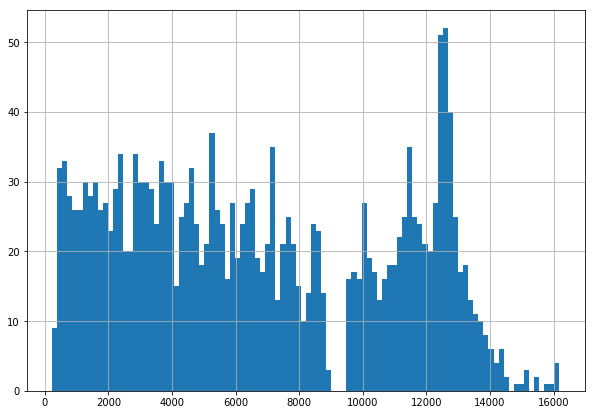

In [37]:
# df_train['Ranking'][(df_train['Rating'] >= 3) & (9000 < df_train['Ranking'])].hist(bins=100)
df_train['Ranking'][(df_train['Rating'] == 4) & (df_train['City'] == 'London')].hist(bins=100)
# data['Ranking'][data['Number of Reviews'] > 1000].hist(bins=100)

In [38]:
# df_train['Ranking'][(df_train['Rating'] < 3) & (1975 < df_train['Ranking']) & (df_train['Ranking'] < 2000)].hist(bins=100)
# df_train['Ranking'][(df_train['Rating'] >= 3) & (df_train['City'] == 'Ljubljana')].hist(bins=100)
df_train['Ranking'][(df_train['Rating'] < 3) & (df_train['City'] == 'Ljubljana')].count()#.hist(bins=100)
df_train['Rating'][(df_train['City'] == 'Ljubljana')].value_counts()

4.0    60
4.5    58
3.5    25
5.0    24
3.0     9
2.5     6
2.0     1
Name: Rating, dtype: int64

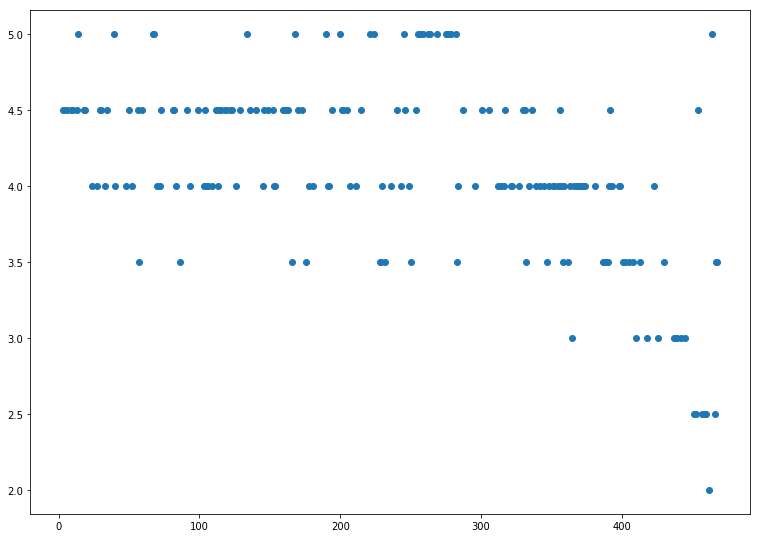

In [39]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
Ljubljana = df_train[(df_train['City'] == 'Ljubljana')]
axes.scatter(x = Ljubljana['Ranking'], y = Ljubljana['Rating'], marker = 'o')


In [40]:
# Попытка вывести более точную зависимость Rating VS Ranking
# Вывод такой. Для каждого города делим диапазон Ranking на 3 части, а последнюю часть еще на 2 части. Соотносим значение Ranking с диапазонами Rating lo/mi/hi:
# если Ranking = от RankMin вкл. до (2 * 0.333 * (RankMax - RankMin)) вкл. --> newIsRatingHigh = 1
# если Ranking = от (2 * 0.333 * (RankMax - RankMin)) искл. до (RankMax - 0.05 * (RankMax - RankMin)) вкл. --> newIsRatingMiddle = 1
# если Ranking = от (RankMax - 0.05 * (RankMax - RankMin)) вкл. до RankMax вкл. --> newIsRatingLow = 1
city = 'Madrid' #'Ljubljana'
rates = {'rate_lo':[1, 2], 'rate_mi':[2.5, 3.5], 'rate_hi':[4, 5]}
RankMin = df_train['Ranking'][(df_train['City'] == city)].min()
RankMax = df_train['Ranking'][(df_train['City'] == city)].max()
band = RankMax - RankMin
k = 0.333*band
print(city+':','band_lo','band_mi','band_hi')
for rate in rates:
    qnty_1 = df_train['Ranking'][(df_train['City'] == city) & (rates[rate][0] <= df_train['Rating']) & (df_train['Rating'] <= rates[rate][1]) &
                                 (RankMin <= df_train['Ranking']) & (df_train['Ranking'] <= 1*k)].count()
    qnty_2 = df_train['Ranking'][(df_train['City'] == city) & (rates[rate][0] <= df_train['Rating']) & (df_train['Rating'] <= rates[rate][1]) &
                                 (1*k < df_train['Ranking']) & (df_train['Ranking'] <= 2*k)].count()
    qnty_3 = df_train['Ranking'][(df_train['City'] == city) & (rates[rate][0] <= df_train['Rating']) & (df_train['Rating'] <= rates[rate][1]) &
                                 (2*k < df_train['Ranking']) & (df_train['Ranking'] <= RankMax - 0.05*band)].count()
    qnty_4 = df_train['Ranking'][(df_train['City'] == city) & (rates[rate][0] <= df_train['Rating']) & (df_train['Rating'] <= rates[rate][1]) &
                                 (RankMax - 0.05*band < df_train['Ranking']) & (df_train['Ranking'] <= RankMax)].count()
    print(rate,qnty_1,qnty_2,qnty_3,qnty_4)
    


Madrid: band_lo band_mi band_hi
rate_lo 0 0 4 104
rate_mi 104 290 724 37
rate_hi 927 778 129 11


In [41]:
df_train[(df_train['City'] == 'Ljubljana')].Ranking.value_counts(bins=3)

(313.0, 468.0]                 68
(2.5340000000000003, 158.0]    59
(158.0, 313.0]                 56
Name: Ranking, dtype: int64

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

In [42]:
data.corr()

,Ranking,Price Range,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,...,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,PriceRangeDummy_0.0,PriceRangeDummy_1.0,PriceRangeDummy_2.0,PriceRangeDummy_3.0,PriceRangeDummy_nan
Ranking,1.000000,-0.244280,-0.223156,6.270720e-03,-0.109897,0.094831,-0.094100,-0.094479,0.015683,-0.026436,...,-0.095269,-0.090999,-0.096816,-0.091422,NaN,0.233946,-0.014712,-0.179755,-0.088647,NaN
Price Range,-0.244280,1.000000,0.312827,-1.211744e-03,0.015052,-0.248109,0.038667,-0.001938,0.000277,-0.062903,...,-0.021735,-0.012577,-0.011940,0.021452,NaN,-0.902706,-0.083131,0.787178,0.364508,NaN
Number of Reviews,-0.223156,0.312827,1.000000,2.689328e-03,0.011011,-0.106146,0.014535,-0.012803,0.009411,-0.049189,...,-0.023952,-0.025642,-0.027033,-0.019862,NaN,-0.266849,-0.039354,0.221169,0.167702,NaN
sample,0.006271,-0.001212,0.002689,1.000000e+00,0.936543,-0.003473,-0.003550,0.002912,0.003577,-0.001989,...,-0.002250,0.003464,-0.004824,-0.004301,NaN,-0.000294,0.003607,-0.002086,-0.000701,NaN
Rating,-0.109897,0.015052,0.011011,9.365435e-01,1.000000,-0.000631,0.007447,0.016852,-0.000703,0.012834,...,-0.010417,0.010188,0.001580,-0.001481,NaN,-0.020519,0.023520,-0.004384,0.018409,NaN
Number_of_Reviews_isNAN,0.094831,-0.248109,-0.106146,-3.472890e-03,-0.000631,1.000000,-0.009408,0.003528,0.004132,0.031383,...,0.008553,0.012519,0.022316,-0.002699,NaN,0.267568,-0.064629,-0.196004,-0.033520,NaN
City_Amsterdam,-0.094100,0.038667,0.014535,-3.550404e-03,0.007447,-0.009408,1.000000,-0.021090,-0.045335,-0.040171,...,-0.024397,-0.028956,-0.023061,-0.019797,NaN,-0.040215,0.000853,0.039729,-0.005216,NaN
City_Athens,-0.094479,-0.001938,-0.012803,2.912415e-03,0.016852,0.003528,-0.021090,1.000000,-0.033888,-0.030027,...,-0.018236,-0.021645,-0.017238,-0.014798,NaN,-0.008647,0.026151,-0.009607,-0.003191,NaN
City_Barcelona,0.015683,0.000277,0.009411,3.577473e-03,-0.000703,0.004132,-0.045335,-0.033888,1.000000,-0.064548,...,-0.039201,-0.046528,-0.037055,-0.031810,NaN,-0.006815,0.013418,-0.000556,-0.007289,NaN
City_Berlin,-0.026436,-0.062903,-0.049189,-1.989259e-03,0.012834,0.031383,-0.040171,-0.030027,-0.064548,1.000000,...,-0.034736,-0.041227,-0.032833,-0.028186,NaN,0.059011,0.001255,-0.050110,-0.019269,NaN


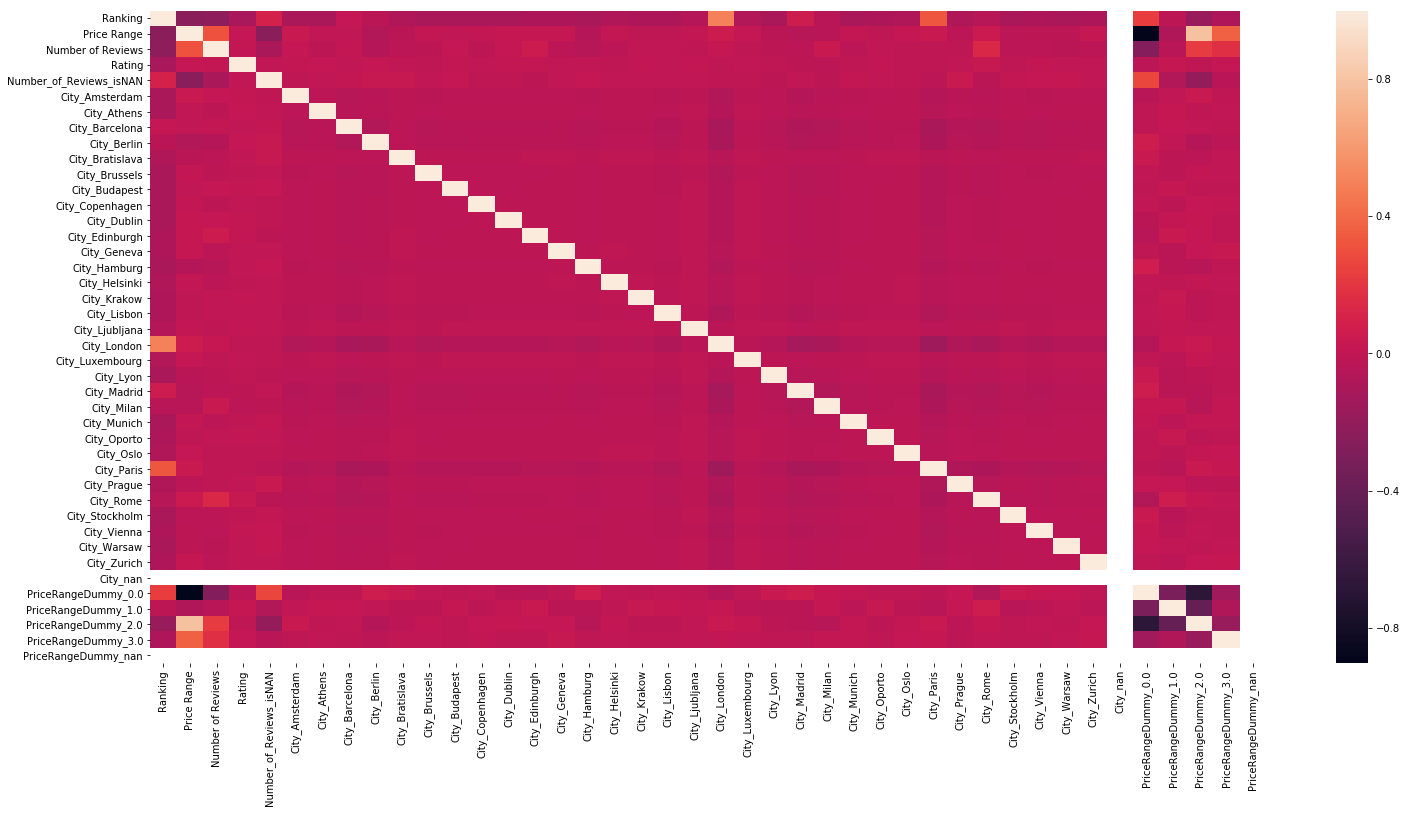

In [43]:
plt.rcParams['figure.figsize'] = (25,12)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свой вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [44]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [45]:
df_input = data.copy()


df_input.head()


,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0


In [46]:
'''Для ускорения работы: при постепенном расширении функции preproc_data полученный датафрейм каждый раз скидывается в файл. 
    Затем по возможности читаем этот файл и добавляем новые колонки. Поэтому после каждого запуска этой функции код расчета новых признаков комментируется.'''

def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    try:
        df_output = pd.read_csv("df_preproc.csv")
    except:
        print('error read_csv 1')
        try:
            df_output = pd.read_csv("../input/df-preproc-07/df_preproc_07.csv")
        except:
            print('error read_csv 2')
            df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем ненужные для модели признаки
#     try:
#         df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
#     except:
#         pass
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    # 2.1. Price Range
#     df_output['Price Range'] = df_output['Price Range'].apply(lambda x: 0 if pd.isna(x) else 1 if x=='$' else 2 if x=='$$ - $$$' else 3)

#     # 2.2. Number of Reviews
#     idxList = df_output.index[df_output['Number of Reviews'].isna()].to_list()
#     for idx in idxList:
#         if df_output.loc[idx, 'Reviews'] == '[[], []]' or pd.isna(df_output.loc[idx, 'Reviews']):
#             df_output.loc[idx, 'Number of Reviews'] = 0
#         else:
#             lst = []
#             lst = re.findall(r'\d\d\/\d\d\/\d{4}', df_output['Reviews'].iloc[idx])
#             df_output.loc[idx, 'Number of Reviews'] = len(lst)

    
#     # ################### 3. Feature Engineering ####################################################
#     # 3.1. является ли город нахождения ресторана столицей (1=Да / 0=Нет)
#     df_output['newIsCapital'] = 1 #сначала записываем везде 1
#     #теперь определяем НЕстолицы: ['Milan', 'Munich', 'Hamburg', 'Barcelona', 'Lyon', 'Oporto', 'Krakow', 'Zurich', 'Geneva'
#     df_output.loc[(df_output['City']=='Milan') | (df_output['City']=='Munich') | (df_output['City']=='Hamburg') | (df_output['City']=='Barcelona') | 
#                   (df_output['City']=='Lyon') | (df_output['City']=='Oporto') | (df_output['City']=='Krakow') | (df_output['City']=='Zurich') | 
#                   (df_output['City']=='Geneva'), 'newIsCapital'] = 0
    
#     # 3.2. диапазон попадания Ranking для каждого города
#     QntyRanges = 10
#     for i in range(QntyRanges):
#         col_name = 'newIsRankRange'+str(i+1)
#         df_output[col_name] = 0 #инициализация колонок
#     for city in df_output.City.unique():
#         rr = df_output.loc[df_output.City==city].Ranking.value_counts(bins=QntyRanges)
#         rr = pd.DataFrame(rr)
#         lst_rr = []
#         for i in range(QntyRanges):
#             lst = []
#             intrv = str(rr.index[i])
#             for s in intrv.strip('( )[ ]').split(', '):
#                 lst.append(float(s))
#             lst_rr += [lst]
#         lst_rr.sort()
#         idxList = df_output.index[df_output.City == city].to_list()
#         for idx in idxList:
#             r = df_output.loc[idx, 'Ranking']
#             for i in range(QntyRanges):
#                 if lst_rr[i][0] < r <= lst_rr[i][1]:
#                     df_output.loc[idx, 'newIsRankRange'+str(i+1)] = 1
                
#     # 3.3. кол-во представленных в ресторане кухонь и разбиение кол-ва кухонь по диапазонам
#     df_output['newQntyCS'] = 0
#     df_output['newIsQntyCSeql01'] = 0
#     df_output['newIsQntyCS02-05'] = 0
#     df_output['newIsQntyCSgrt05'] = 0
#     idx = -1
#     cuisines = set()  # создаём пустое множество для хранения уникальных значений кухонь
#     for v in df_output['Cuisine Style'].apply(lambda x: str(x).strip('[]')):
#         idx += 1
#         QntyCS = 0
#         if pd.isna(str(v)) or str(v).lower() == 'nan':
#             QntyCS = 1
#             df_output.loc[idx, 'newQntyCS'] = 1
#         elif ',' not in v:
#             QntyCS = 1
#             df_output.loc[idx, 'newQntyCS'] = 1
#             cuisines.add(v.strip())
#         else:
#             for cs in v.split(','):
#                 QntyCS += 1
#                 df_output.loc[idx, 'newQntyCS'] += 1
#                 cuisines.add(cs.strip())
#         if QntyCS == 1:
#             df_output.loc[idx, 'newIsQntyCSeql01'] = 1
#         if 2 <= QntyCS <= 5:
#             df_output.loc[idx, 'newIsQntyCS02-05'] = 1
#         elif 5 < QntyCS:
#             df_output.loc[idx, 'newIsQntyCSgrt05'] = 1
#     cs = pd.DataFrame()
#     idx = -1
#     for s in cuisines:
#         #print(s)
#         idx += 1
#         cs.loc[idx, 'cuisine'] = s.strip("'")
#     cs.to_csv('cuisines.csv', index=False) #скидываем в файл

    # 3.4. Новое разбиение Ranking по диапазонам. Гипотеза:
           # если Ranking = от RankMin вкл. до (2 * 0.333 * (RankMax - RankMin)) вкл. --> newIsRatingHigh = 1
           # если Ranking = от (2 * 0.333 * (RankMax - RankMin)) искл. до (RankMax - 0.05 * (RankMax - RankMin)) вкл. --> newIsRatingMiddle = 1
           # если Ranking = от (RankMax - 0.05 * (RankMax - RankMin)) вкл. до RankMax вкл. --> newIsRatingLow = 1
#     idx = -1
#     d = {}
#     for i in range(df_input['City'].count()):
#         idx += 1
#         city = df_input.iloc[idx]['City']
#         if not city in d.keys():
#             d[city] = [df_input['Ranking'][(df_input['City'] == city)].min()]
#             d[city] += [df_input.iloc[idx]['Ranking']]
#             d[city] += [df_input['Ranking'][(df_input['City'] == city)].max()]
#             d[city] += [2 * 0.333 * (d[city][2] - d[city][0])]
#             d[city] += [0.05 * 2 * 0.333 * (d[city][2] - d[city][0])]
#             #print(d)

#         RankMin = d[city][0]
#         RankCur = d[city][1]
#         RankMax = d[city][2]
#         double_band = d[city][3]
#         band_min = d[city][4]
#         #print(city, RankMin, RankCur, RankMax, double_band, band_min)

#         df_input.loc[idx, 'newIsRatingLow'] = 1 if (RankMax - band_min) < RankCur <= RankMax else 0
#         df_input.loc[idx, 'newIsRatingMiddle'] = 1 if double_band < RankCur <= (RankMax - band_min) else 0
#         df_input.loc[idx, 'newIsRatingHigh'] = 1 if RankMin <= RankCur <= double_band else 0
#     df_output['newIsRatingLow'] = df_input['newIsRatingLow']
#     df_output['newIsRatingMiddle'] = df_input['newIsRatingMiddle']
#     df_output['newIsRatingHigh'] = df_input['newIsRatingHigh']

    # 3.5. наименование колонки по названию стиля кухни
#     df_output['Cuisine Style'] = df_input['Cuisine Style']
#     df_output['Cuisine Style'] = df_input['Cuisine Style'].fillna('noname')
#     cuisines = pd.read_csv('../input/cuisines/cuisines.csv')
#     for item in cuisines.cuisine:
#         df_output[item] = df_output['Cuisine Style'].apply(lambda x: 1 if item in x else 0)
    
    # 3.6. является ли ресторан сетевым, т.е. представлен ли ресторан в нескольких городах
#     df_input['newIsChain'] = 1
#     df_chain = pd.DataFrame(df_input.groupby(df_input['Restaurant_id']).newIsChain.count())
#     df_chain.columns = ['cnt']
#     idxList = df_chain.index[df_chain['cnt'] == 1].to_list() #это НЕсетевые рестораны
#     df_input['newIsChain'] = df_input['Restaurant_id'].apply(lambda x: 0 if x in idxList else 1)
#     df_output['newIsChain'] = df_input['newIsChain']

    # 3.7. обратная величина Ranking
#     df_output['RankingInverse'] = 1 / df_output['Ranking']

    # 3.8. 
    # Сначала определим мин. и макс. даты отзывов вообще
#     DatMin = pd.to_datetime('2004-04-21 00:00:00')
#     DatMax = pd.to_datetime('2018-02-26 00:00:00')
    #DatMin / DatMax: 2004-04-21 00:00:00 2018-02-26 00:00:00

    # idxList = df_input.index[(df_input['Reviews'] != '[[], []]')].to_list()
    # for idx in idxList:
    #     if pd.isna(df_input['Reviews'].iloc[idx]):
    #         continue
    #     lst = re.findall(r'\d\d\/\d\d\/\d{4}', df_input['Reviews'].iloc[idx])
    #     t1 = pd.to_datetime(lst[0])
    #     if len(lst) == 1:
    #         #print(t1)
    #         if DatMin > t1:
    #             DatMin = t1
    #         if DatMax < t1:
    #             DatMax = t1
    #     else:
    #         t2 = pd.to_datetime(lst[1])
    #         #print(t1, t2)
    #         if t2 >= t1:
    #             if DatMin > t1:
    #                 DatMin = t1
    #             if DatMax < t2:
    #                 DatMax = t2
    #         else:
    #             if DatMin > t2:
    #                 DatMin = t2
    #             if DatMax < t1:
    #                 DatMax = t1

    # Создадим новые колонки с датами отзывов
#     idxList = df_input.index.to_list()
#     for idx in idxList:
#         if pd.isna(df_input['Reviews'].iloc[idx]):
#             lst = []
#         else:
#             lst = re.findall(r'\d\d\/\d\d\/\d{4}', df_input['Reviews'].iloc[idx])
#         if len(lst) == 0:
#             t1 = DatMin
#             t2 = DatMax
#         elif len(lst) == 1:
#             t1 = DatMin
#             t2= pd.to_datetime(lst[0])
#         else:
#             t1 = pd.to_datetime(lst[0])
#             t2 = pd.to_datetime(lst[1])
#         numRev = df_input['Number of Reviews'].iloc[idx]
#         if len(lst) < 2 and numRev > 0:
#             #пересчитаем t1
#             t1 = t2 - (t2-t1)/numRev
#         df_input.loc[idx, 'ReviewDate1'] = t1
#         df_input.loc[idx, 'ReviewDate2'] = t2
#         if t2 >= t1:
#             df_input.loc[idx, 'newQntyDaysBetwRev'] = (t2 - t1).days
#         else:
#             df_input.loc[idx, 'newQntyDaysBetwRev'] = (t1 - t2).days
#     df_output['ReviewDate1'] = df_input['ReviewDate1']
#     df_output['ReviewDate2'] = df_input['ReviewDate2']
#     df_output['newQntyDaysBetwRev'] = df_input['newQntyDaysBetwRev']


#     # ################### 4. Encoding ############################################################## 
#     # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
#     df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)

#     # Number of Reviews
#     # Дополнительный подход. Сначала скопируем колонку
#     df_output['PriceRangeDummy'] = df_output['Price Range']
#     df_output = pd.get_dummies(df_output, columns=['PriceRangeDummy',], dummy_na=True)


    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [47]:
%%time
df_preproc = preproc_data(data)

# Чтение файла вставлено в функцию --Если уже есть готовый файл, берем данные из него
# df_preproc = pd.read_csv("../input/df-preproc/df_preproc.csv")
# df_preproc_copy = df_preproc.copy()

df_preproc.sample(10)

error read_csv 1
CPU times: user 1.05 s, sys: 160 ms, total: 1.21 s
Wall time: 1.22 s


,Ranking,Price Range,Number of Reviews,sample,Rating,newIsCapital,newIsRankRange1,newIsRankRange2,newIsRankRange3,newIsRankRange4,...,Contemporary,Malaysian,Japanese,Egyptian,newIsChain,RankingInverse,newIsRatingLow,newIsRatingMiddle,newIsRatingHigh,newQntyDaysBetwRev
49933,5210.0,2,43.0,1,4.0,1,0,0,0,1,...,0,0,0,0,1,0.000192,0.0,1.0,0.0,286.0
37587,2860.0,0,20.0,1,4.5,1,0,0,0,1,...,0,0,0,0,1,0.000350,0.0,0.0,1.0,252.0
40384,861.0,2,75.0,1,4.5,1,0,0,0,0,...,0,0,0,0,1,0.001161,0.0,0.0,1.0,8.0
22189,3799.0,3,35.0,1,4.5,1,0,0,0,0,...,0,0,0,0,1,0.000263,0.0,0.0,1.0,144.0
20884,458.0,1,55.0,1,4.0,1,0,0,0,0,...,0,0,0,0,1,0.002183,0.0,0.0,1.0,88.0
36499,758.0,2,158.0,1,4.0,0,0,0,1,0,...,0,0,0,0,1,0.001319,0.0,1.0,0.0,3.0
34038,13062.0,1,20.0,1,4.0,1,0,0,0,0,...,0,0,0,0,0,0.000077,0.0,0.0,1.0,39.0
993,5223.0,0,54.0,0,0.0,1,0,0,0,0,...,0,0,0,0,1,0.000191,0.0,0.0,1.0,93.0
46577,2747.0,0,2.0,1,4.0,1,0,0,0,0,...,0,0,0,0,1,0.000364,0.0,0.0,1.0,2337.0
10826,1676.0,2,41.0,1,4.0,1,0,0,0,0,...,0,0,0,0,1,0.000597,1.0,0.0,0.0,72.0


In [48]:
# !!! Скинем в файл рассчитанные данные
df_preproc.to_csv('df_preproc.csv', index=False)
# df_preproc = pd.read_csv('df_preproc.csv')

In [49]:
# Сохраним копию
df_preproc_copy = df_preproc.copy()

# Удалим колонки
object_columns = ['newIsRankRange1','newIsRankRange2','newIsRankRange3','newIsRankRange4','newIsRankRange5','newIsRankRange6','newIsRankRange7',
                  'newIsRankRange8','newIsRankRange9','newIsRankRange10','newIsQntyCSeql01','newIsQntyCS02-05','newIsQntyCSgrt05',
                  'PriceRangeDummy_0.0','PriceRangeDummy_1.0','PriceRangeDummy_2.0','PriceRangeDummy_3.0','PriceRangeDummy_nan']
# try:
#     df_preproc.drop(object_columns, axis = 1, inplace=True)
# except:
#     pass

df_preproc.drop(object_columns, axis = 1, inplace=True)


In [50]:
#Удаление кухонь
# object_columns = ['Pub','Peruvian','Mediterranean','Southwestern','Indonesian','Azerbaijani','New Zealand','Latin','Uzbek','Central Asian','African','Ukrainian',
#                   'Healthy','Austrian','Dutch','Cuban','Taiwanese','Romanian','Polish','Filipino','Pizza','Street Food','Wine Bar','Sri Lankan','Gluten Free Options',
#                   'Yunnan','British','Korean','Irish','Australian','Asian','Diner','Brew Pub','Barbecue','Seafood','Delicatessen','Kosher','Scandinavian',
#                   'Bangladeshi','Caribbean','Arabic','Fast Food','Hungarian','Danish','Russian','Salvadoran','Vegan Options','Thai','Hawaiian','Colombian','Gastropub',
#                   'Polynesian','Balti','Vietnamese','Venezuelan','Fujian','Central European','Croatian','Italian','Steakhouse','Fusion','Cafe','Slovenian','Welsh',
#                   'Mexican','Ecuadorean','Portuguese','Grill','Czech','Tibetan','Persian','Greek','Israeli','Swedish','Brazilian','Cambodian','Afghani','Belgian',
#                   'Caucasian','French','American','Mongolian','Indian','Ethiopian','Chilean','Burmese','Georgian','Sushi','International','Jamaican','Latvian',
#                   'Nepali','Minority Chinese','Turkish','Halal','German','Albanian','South American','Tunisian','Bar','Contemporary','Malaysian','Japanese','Egyptian']
# object_columns = ['Chinese','Singaporean','Armenian','Norwegian','Canadian','Eastern European','Argentinean','Xinjiang','Spanish','Soups','Swiss','Pakistani']
# object_columns = ['Native American','Cajun & Creole','Vegetarian Friendly','Moroccan','Middle Eastern','Scottish','Central American','Lebanese']
# object_columns = ['European']
# df_preproc.drop(object_columns, axis = 1, inplace=True)
# df_preproc.sample(10)

In [51]:
df_preproc.sample(10)

,Ranking,Price Range,Number of Reviews,sample,Rating,newIsCapital,newQntyCS,City_Amsterdam,City_Athens,City_Barcelona,...,Contemporary,Malaysian,Japanese,Egyptian,newIsChain,RankingInverse,newIsRatingLow,newIsRatingMiddle,newIsRatingHigh,newQntyDaysBetwRev
4342,1653.0,1,12.0,0,0.0,1,4,0,1,0,...,0,0,0,0,0,0.000605,0.0,0.0,1.0,76.0
20305,457.0,2,239.0,1,4.0,1,6,0,0,0,...,0,0,0,0,1,0.002188,0.0,0.0,1.0,3.0
24776,11223.0,0,5.0,1,4.0,1,1,0,0,0,...,0,0,0,0,0,0.000089,0.0,0.0,1.0,259.0
12770,5984.0,1,13.0,1,4.0,0,2,0,0,1,...,0,0,0,0,1,0.000167,0.0,1.0,0.0,149.0
23357,5378.0,0,12.0,1,3.5,1,1,0,0,0,...,0,0,0,0,1,0.000186,0.0,0.0,1.0,342.0
25573,253.0,2,77.0,1,4.5,0,3,0,0,0,...,0,0,0,0,1,0.003953,0.0,0.0,1.0,24.0
49784,785.0,2,332.0,1,4.5,1,7,0,0,0,...,0,0,0,0,1,0.001274,0.0,0.0,1.0,83.0
14258,902.0,2,208.0,1,4.5,1,4,0,0,0,...,0,0,0,0,1,0.001109,0.0,1.0,0.0,245.0
18223,826.0,2,330.0,1,4.0,0,3,0,0,0,...,0,0,0,0,1,0.001211,0.0,1.0,0.0,313.0
43620,1488.0,0,3.0,1,4.0,1,6,0,0,0,...,0,0,0,0,1,0.000672,0.0,0.0,1.0,90.0


In [52]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 170 entries, Ranking to newQntyDaysBetwRev
dtypes: float64(8), int64(162)
memory usage: 64.8 MB


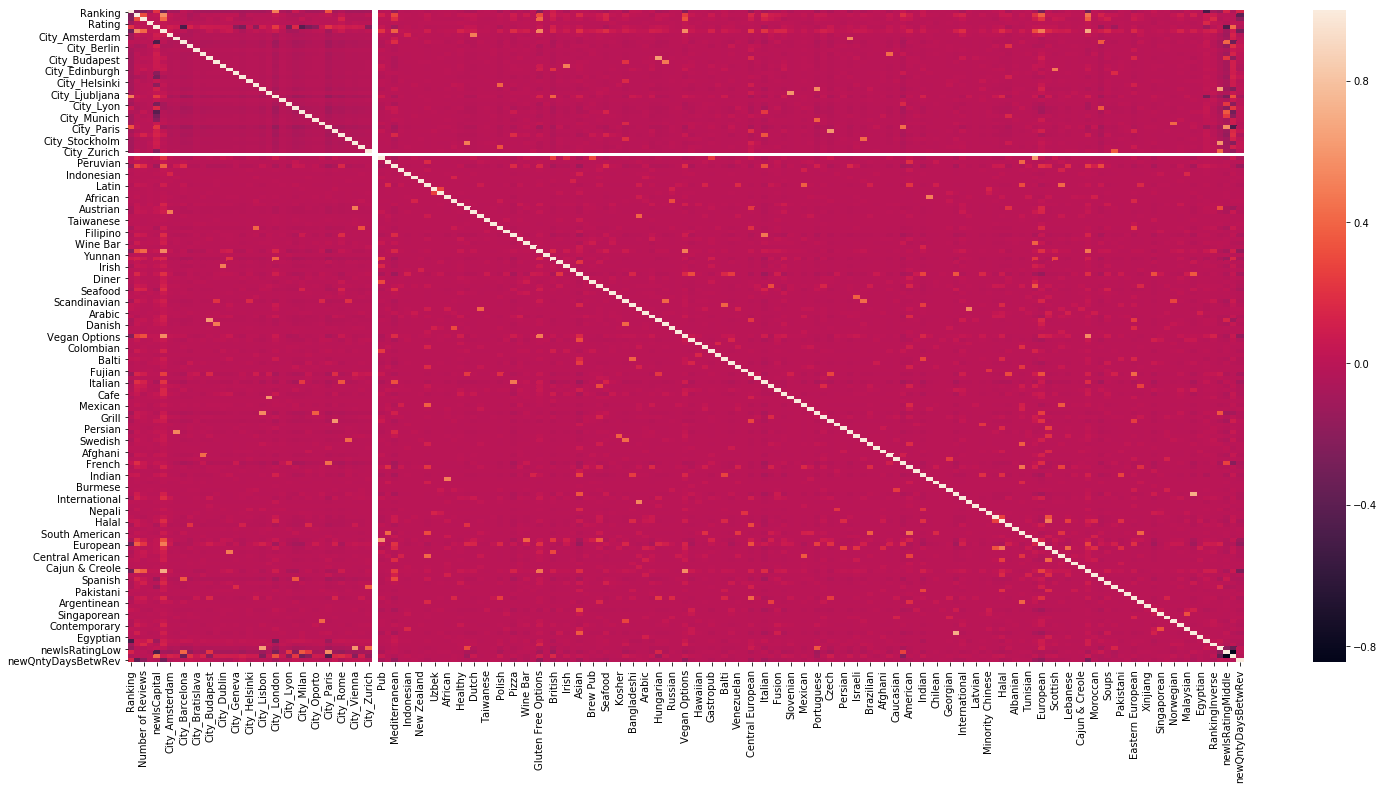

In [53]:
plt.rcParams['figure.figsize'] = (25,12)
sns.heatmap(df_preproc.drop(['sample'], axis=1).corr(),)

In [54]:
df_preproc.corr()

,Ranking,Price Range,Number of Reviews,sample,Rating,newIsCapital,newQntyCS,City_Amsterdam,City_Athens,City_Barcelona,...,Contemporary,Malaysian,Japanese,Egyptian,newIsChain,RankingInverse,newIsRatingLow,newIsRatingMiddle,newIsRatingHigh,newQntyDaysBetwRev
Ranking,1.000000,-0.244280,-0.223156,0.006271,-0.109897,0.202905,-0.322408,-0.094100,-0.094479,0.015683,...,-0.040891,0.021614,-0.000338,-0.005610,-0.502592,-0.093004,-0.158444,0.133759,-0.041076,0.137863
Price Range,-0.244280,1.000000,0.312827,-0.001212,0.015052,0.037928,0.563037,0.038667,-0.001938,0.000277,...,0.089954,0.010594,0.101686,-0.000417,0.071512,0.080926,-0.004422,0.000650,0.001783,-0.391311
Number of Reviews,-0.223156,0.312827,1.000000,0.002689,0.011011,0.013963,0.409403,0.014535,-0.012803,0.009411,...,0.040551,-0.000388,0.005336,-0.000666,0.061936,0.150098,-0.023807,0.009311,0.004078,-0.184080
sample,0.006271,-0.001212,0.002689,1.000000,0.936543,0.004400,-0.003202,-0.003550,0.002912,0.003577,...,0.000617,0.001089,-0.006341,0.001826,0.079858,0.006443,-0.003028,-0.002833,0.004336,-0.003783
Rating,-0.109897,0.015052,0.011011,0.936543,1.000000,0.010620,0.034506,0.007447,0.016852,-0.000703,...,0.011498,-0.002293,-0.010047,0.003391,0.150831,0.030617,0.005749,-0.018020,0.014000,-0.004451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RankingInverse,-0.093004,0.080926,0.150098,0.006443,0.030617,-0.007587,0.121427,0.010275,0.008134,-0.015934,...,0.040566,-0.001903,-0.001427,0.003076,0.021617,1.000000,0.007810,-0.026798,0.021222,-0.042968
newIsRatingLow,-0.158444,-0.004422,-0.023807,-0.003028,0.005749,0.039381,0.020105,-0.048001,-0.035881,-0.077130,...,0.017866,-0.002387,-0.007772,-0.002806,0.054068,0.007810,1.000000,-0.191449,-0.360969,0.022186
newIsRatingMiddle,0.133759,0.000650,0.009311,-0.002833,-0.018020,-0.469417,-0.090193,-0.112530,-0.084115,0.402875,...,-0.006091,-0.013767,0.029896,0.005066,-0.009894,-0.026798,-0.191449,1.000000,-0.846220,0.010966
newIsRatingHigh,-0.041076,0.001783,0.004078,0.004336,0.014000,0.424639,0.074783,0.132979,0.099401,-0.340921,...,-0.003911,0.014377,-0.024186,-0.003290,-0.019952,0.021222,-0.360969,-0.846220,1.000000,-0.022463


In [55]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [56]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [57]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 169), (40000, 169), (40000, 168), (32000, 168), (8000, 168))

# Model 
Сам ML

In [58]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [59]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [60]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [61]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
# V2 MAE: 0.211540625
# V3 MAE: 0.21103 - добавил newIsCapital
# V4 MAE: 0.215688750 - разбиение Ranking по 5-ти диапазонам
# V4 MAE: 0.214689375 - разбиение Ranking по 10-ти диапазонам
# V5 MAE: 0.210848125 - V2+V3 + кол-во кухонь
# V6 MAE: 0.210740625 - V2+V3+V5 + разбиение Ranking по двум диапазонам: newIsRankHi и newIsRankLo
# V7 MAE: 0.209056250 - V2+V3+V5+V6 + создание колонок по наименованию кухонь
# V8 MAE: 0.209043750 - V2+V3+V5+V6+V7 + является ли ресторан сетевым
# V9 MAE: 0.208695625 - V2+V3+V5+V6+V7+V8 + обратная величина Ranking
# V10 MAE: 0.208706875 - V2+V3+V5+V6+V7+V8+V9 + вместо newIsRankHi и newIsRankLo теперь новое разбиение newIsRatingLow,newIsRatingMiddle,newIsRatingHigh
# V11 MAE: 0.208886250 - V2+V3+V5+V6+V7+V8+V9+V10 + кол-во дней между двумя последними отзывами

MAE: 0.20888625000000002


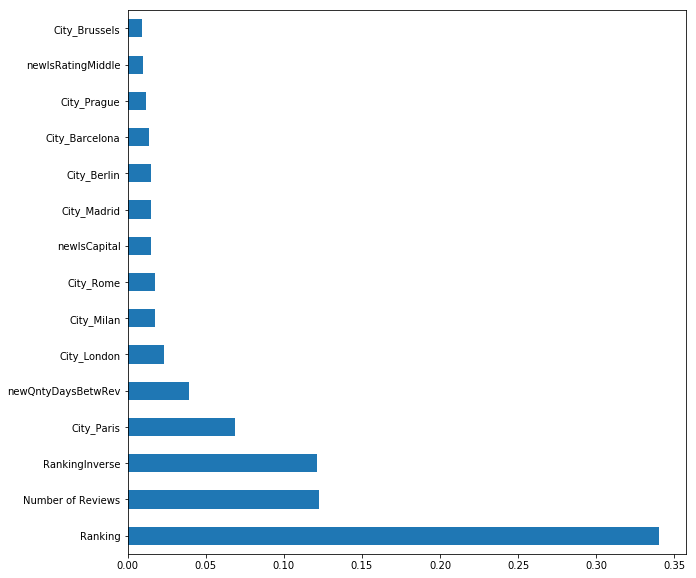

In [62]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели**
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраивает - готовим Submission на кагл

In [63]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,newIsCapital,newQntyCS,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,...,Contemporary,Malaysian,Japanese,Egyptian,newIsChain,RankingInverse,newIsRatingLow,newIsRatingMiddle,newIsRatingHigh,newQntyDaysBetwRev
2683,13253.0,2,4.0,0.0,1,1,0,0,0,0,...,0,0,0,0,1,0.000075,0.0,0.0,1.0,484.0
3646,3014.0,0,2.0,0.0,1,1,0,0,0,0,...,0,0,0,0,1,0.000332,0.0,0.0,1.0,2425.0
5120,3662.0,2,276.0,0.0,1,2,0,0,0,0,...,0,0,0,0,1,0.000273,0.0,1.0,0.0,43.0
4358,4743.0,0,10.0,0.0,1,1,0,0,0,1,...,0,0,0,0,1,0.000211,0.0,0.0,1.0,343.0
7041,3280.0,2,85.0,0.0,1,5,0,0,0,0,...,0,0,0,0,1,0.000305,1.0,0.0,0.0,217.0
8453,688.0,2,34.0,0.0,1,4,0,0,0,0,...,0,0,0,0,1,0.001453,0.0,0.0,1.0,23.0
9366,6091.0,2,15.0,0.0,1,1,0,0,0,0,...,0,0,0,0,1,0.000164,0.0,0.0,1.0,4.0
2032,5377.0,2,107.0,0.0,1,2,0,0,0,0,...,0,0,0,0,1,0.000186,0.0,1.0,0.0,4.0
1537,11213.0,2,19.0,0.0,1,2,0,0,0,0,...,0,0,0,0,1,0.000089,0.0,0.0,1.0,290.0
2996,2946.0,2,206.0,0.0,0,3,0,0,1,0,...,0,0,0,0,1,0.000339,0.0,1.0,0.0,102.0


In [64]:
test_data = test_data.drop(['Rating'], axis=1)

In [65]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [66]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [67]:
predict_submission

array([3.005, 4.315, 4.505, ..., 3.005, 4.495, 4.28 ])

In [68]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.005
1,id_1,4.315
2,id_2,4.505
3,id_3,4.390
4,id_4,4.470
5,id_5,4.390
6,id_6,2.425
7,id_7,2.860
8,id_8,4.035
9,id_9,4.725


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!


In [69]:
# import pandas as pd
# df_preproc_05 = pd.read_csv("../input/df_preproc_05.csv")